In [1]:
import sys
sys.path.append('../src')
import pandas as pd

from data_processing import load_data, clean_data
from feature_engineering import add_time_features, add_lag_features
from models import train_baseline_model
from visualization import plot_traffic_pollution


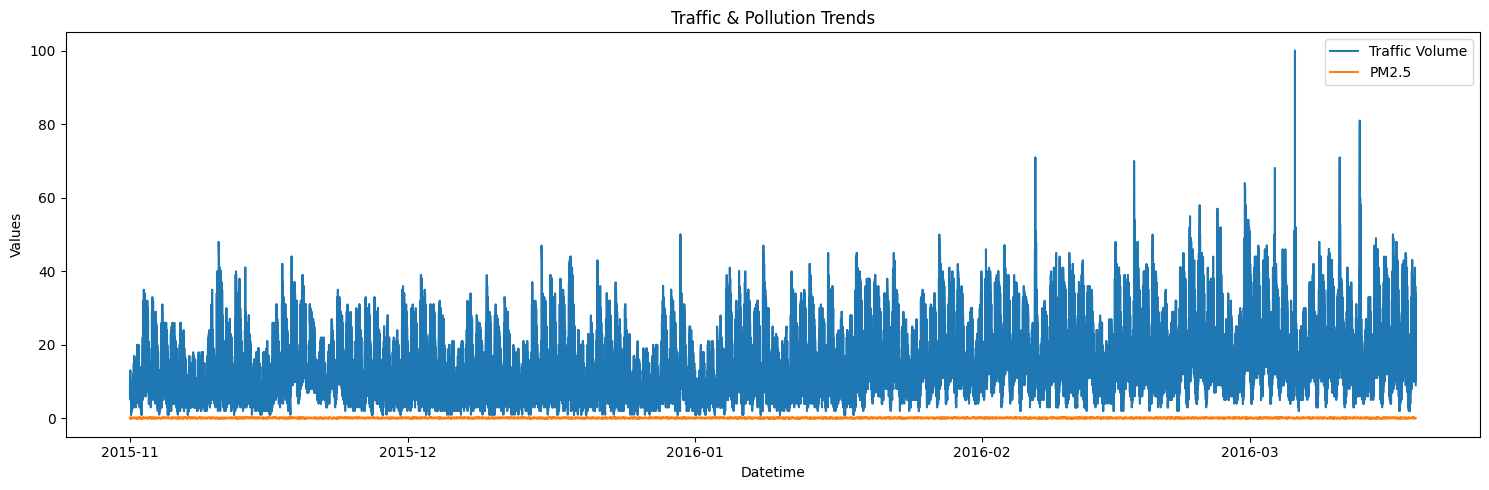

RMSE: 0.04, MAE: 0.03


In [2]:
# Load and clean data

df_traffic = load_data('../data/delhi_traffic.csv')
df_emission = load_data('../data/vehicle_emission.csv')

df_traffic = clean_data(df_traffic)
df_emission = clean_data(df_emission)

# Merge datasets on 'datetime'
df = pd.merge(df_traffic, df_emission, on='datetime', how='inner')

# Feature engineering
df = add_time_features(df)
df = add_lag_features(df, cols=['traffic_volume', 'pm25'])

# Visualize trends
plot_traffic_pollution(df)

# Train model to predict pollution
feature_cols = [col for col in df.columns if 'lag' in col or col in ['hour','day_of_week','month']]
target_col = 'pm25'
model = train_baseline_model(df, target_col, feature_cols)
